# BREAST CANCER PREDICTION

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] =data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [4]:
#df = df.drop(columns=['id'])
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [5]:
# le = LabelEncoder()
# df['diagnosis'] = le.fit_transform(df['diagnosis'])
# df.head()

In [6]:
x1 = df.drop(columns=['target'])
y1= df['target']

In [7]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)
outliers = iso.fit_predict(x1.select_dtypes(include='number'))

# Create filtered dataset
x1['outlier'] = outliers
x = x1[x1['outlier'] == 1].drop('outlier', axis=1)
y = y1[x1['outlier'] == 1]


In [9]:
y.head()

1    0
2    0
4    0
5    0
6    0
Name: target, dtype: int32

In [10]:
scaler = StandardScaler()
X= scaler.fit_transform(x)

In [11]:
X

array([[ 2.07912751, -0.33652468,  1.94312981, ...,  1.23403587,
        -0.21235084,  0.39569338],
       [ 1.8035559 ,  0.48532537,  1.81033338, ...,  2.15882098,
         1.32617836,  0.30564648],
       [ 1.99144563, -1.14656653,  2.04387194, ...,  0.85276481,
        -0.90049947, -0.36970531],
       ...,
       [ 1.9413417 ,  2.13847201,  1.86528363, ...,  0.8576321 ,
        -0.52968363, -1.0206694 ],
       [ 0.83592376,  2.09832416,  0.81664973, ...,  0.5169218 ,
        -1.16078367, -0.28090906],
       [-1.93231836,  1.26230429, -1.94826359, ..., -1.78368397,
         0.00336415, -0.76928845]])

In [12]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
print(X.shape,X_train.shape,X_test.shape)

(540, 30) (432, 30) (108, 30)


In [14]:
classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Naive Bayes": GaussianNB()  # doesn't have random_state
}

In [16]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

accuracy_results_train = {}
accuracy_results_test = {}
precision_results_test = {}
f1_results_test = {}

for name, model in classifiers.items():
    model.fit(X_train, y_train)  # Train the model
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    # Evaluation metrics
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    precision = precision_score(y_test, test_predictions)
    f1 = f1_score(y_test, test_predictions)
    cm = confusion_matrix(y_test, test_predictions)
    
    # Store results
    accuracy_results_train[name] = train_accuracy
    accuracy_results_test[name] = test_accuracy
    precision_results_test[name] = precision
    f1_results_test[name] = f1

    # Display metrics
    print(f"{name}:\n"
          f"  Train Accuracy: {train_accuracy:.2f}\n"
          f"  Test Accuracy: {test_accuracy:.2f}\n"
          f"  Precision: {precision:.2f}\n"
          f"  F1 Score: {f1:.2f}\n"
          f"  Confusion Matrix:\n{cm}\n")

# Select the best model based on F1 Score
best_model_name = max(f1_results_test, key=f1_results_test.get)
best_model = classifiers[best_model_name]
best_predictions = best_model.predict(X_test)
best_cm = confusion_matrix(y_test, best_predictions)

print(f"\nBest Model: {best_model_name}")
print(f"  Test Accuracy: {accuracy_results_test[best_model_name]:.2f}")
print(f"  Precision: {precision_results_test[best_model_name]:.2f}")
print(f"  F1 Score: {f1_results_test[best_model_name]:.2f}")
print(f"  Confusion Matrix:\n{best_cm}")


K-Nearest Neighbors:
  Train Accuracy: 0.98
  Test Accuracy: 0.94
  Precision: 0.96
  F1 Score: 0.95
  Confusion Matrix:
[[31  3]
 [ 4 70]]

Decision Tree:
  Train Accuracy: 1.00
  Test Accuracy: 0.93
  Precision: 0.96
  F1 Score: 0.95
  Confusion Matrix:
[[31  3]
 [ 5 69]]

Random Forest:
  Train Accuracy: 1.00
  Test Accuracy: 0.98
  Precision: 0.99
  F1 Score: 0.99
  Confusion Matrix:
[[33  1]
 [ 1 73]]

Support Vector Machine:
  Train Accuracy: 0.99
  Test Accuracy: 0.95
  Precision: 0.95
  F1 Score: 0.97
  Confusion Matrix:
[[30  4]
 [ 1 73]]

Naive Bayes:
  Train Accuracy: 0.94
  Test Accuracy: 0.94
  Precision: 0.97
  F1 Score: 0.96
  Confusion Matrix:
[[32  2]
 [ 4 70]]


Best Model: Random Forest
  Test Accuracy: 0.98
  Precision: 0.99
  F1 Score: 0.99
  Confusion Matrix:
[[33  1]
 [ 1 73]]


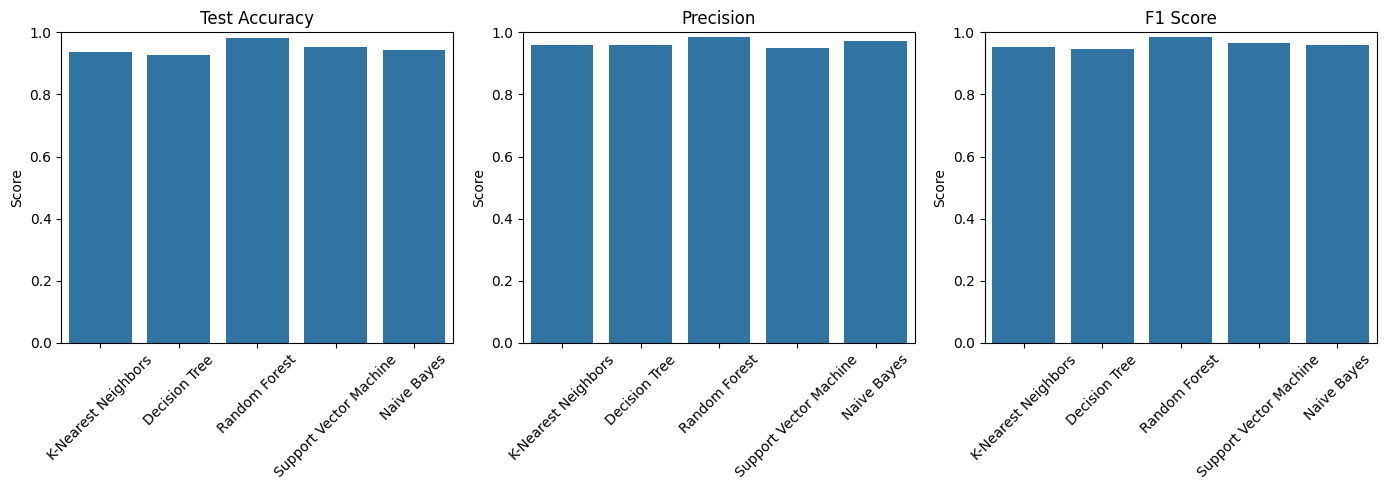

In [17]:
metrics_df = {
    'Test Accuracy': accuracy_results_test,
    'Precision': precision_results_test,
    'F1 Score': f1_results_test
}

plt.figure(figsize=(14, 5))
for idx, (metric_name, values) in enumerate(metrics_df.items()):
    plt.subplot(1, 3, idx + 1)
    sns.barplot(x=list(values.keys()), y=list(values.values()))
    plt.title(metric_name)
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.ylabel("Score")

plt.tight_layout()
plt.show()

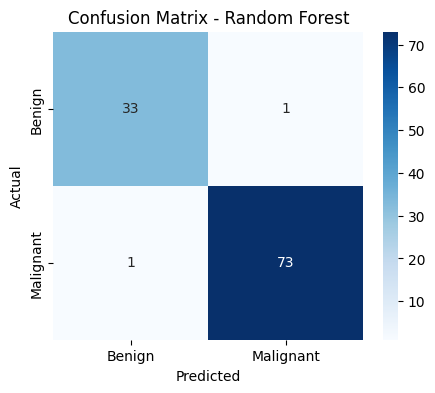

In [18]:
plt.figure(figsize=(5, 4))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
def test_breast_cancer_model(samples, scaler, model, feature_columns):
    for i, sample in enumerate(samples, start=1):
        sample_df = pd.DataFrame([sample], columns=feature_columns)
        sample_scaled = scaler.transform(sample_df)
        prediction = model.predict(sample_scaled)
        result = "Malignant (1)" if prediction[0] == 1 else "Benign (0)"
        print(f"Sample {i}: Prediction = {result}")


In [24]:
# Filter some malignant cases
malignant_samples = df[df['target'] == 1].sample(5, random_state=42).drop('target', axis=1)
malignant_labels = [1] * len(malignant_samples)

# Scale and predict
scaled_malignant = scaler.transform(malignant_samples)
preds = best_model.predict(scaled_malignant)

for i in range(len(preds)):
    print(f"Sample {i+1}: Actual = {malignant_labels[i]}, Predicted = {preds[i]}")


Sample 1: Actual = 1, Predicted = 1
Sample 2: Actual = 1, Predicted = 1
Sample 3: Actual = 1, Predicted = 1
Sample 4: Actual = 1, Predicted = 1
Sample 5: Actual = 1, Predicted = 1


In [25]:
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))


              precision    recall  f1-score   support

      Benign       0.97      0.97      0.97        34
   Malignant       0.99      0.99      0.99        74

    accuracy                           0.98       108
   macro avg       0.98      0.98      0.98       108
weighted avg       0.98      0.98      0.98       108



In [26]:
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the features (reuse your scaler or create a new one)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Step 3: Save both scaler and model
model_data = {
    'scaler': scaler,
    'model': rf_model
}
joblib.dump(model_data, 'random_forest_breast_cancer_model.pkl')
print("✅ Random Forest model and scaler saved as 'random_forest_breast_cancer_model.pkl'")


✅ Random Forest model and scaler saved as 'random_forest_breast_cancer_model.pkl'
